NBA Analysis

The NBA is one of the most popular sports leagues on Earth with an average of 1.28 million viewers, according to variety.com,and it continues to prove itself as a fascinating league with plenty of excitement.

This past season saw the Golden State Warriors defeat the Cleveland Cavaliers and claim their third title in four seasons.

This season also saw many teams make the playoffs in surprsing ways. From the Milwaukee Bucks making the playoffs despite having a negative point differential to the Denver Nuggets missing out on the playoffs on the final day of the regular season with a positive point differential.

With this problem, we are looking to find a linear regression model that best fits the data. We can use this data to see the desired point differential to make the playoffs, helping teams to perform to the level of making the playoffs or potentially dropping off completely and heading to the draft to create a team(Trust the process).

Note: While this may seem like a simple linear regression, it does help us go over all the necessary foundations for us to move forward.

In [13]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
%matlpotlib inline 
import random
import seaborn as sns

UsageError: Line magic function `%matlpotlib` not found.


Here are all the team stats from last season(2018-19 NBA Season): wins, PPG, OPPG, and PD (Points per game, Opponent points per game, and Point differential). The teams are listed in terms of games won starting with the team with the best record in the Bucks to the team headed for a lottery pick in the draft in the Pheonix Suns. This entire dataset is not used entirely but it shows us how the teams performed and how they came to achieve these point differentials.

In [14]:
#df=pd.read_csv("/Users/AntoineTamagno/Documents/nba.csv",index_col=None,delimiter="\t")
#df.head()

Now this is where the fun begins, in this .txt file, you will find the dataset used for this process. You will find each team's wins as well as their point differential to help us build our linear regression.

In [15]:
nba=np.loadtxt("/Users/Antoine/Documents/nbaPF.txt")


In [16]:
nba.shape

(30, 2)

Text(0.5,1,'Point Dif. vs Wins')

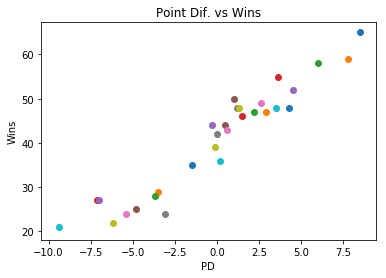

In [17]:
for sample in enumerate(nba):
    plt.scatter(sample[1][0], sample[1][1])
plt.xlabel('PD')
plt.ylabel('Wins')
plt.title('Point Dif. vs Wins')


The graph should be displayed like this showing us the point differential on the x-axis and the team's wins on the y-axis. Now, we move onto the gradient descent which we discussed in the powerpoint.

In [18]:
def gradientDescent(x, y, theta, alpha, m, numIterations):
    xTrans = x.transpose()
    for i in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
    
        gradient = np.dot(xTrans, loss) / m
        theta = theta - alpha * gradient
    return theta

In [19]:
def dataFormat(nba, numOfRows):
    x = np.zeros(shape=(numOfRows, 2))
    y = np.zeros(shape=numOfRows)
    for i, sample in enumerate(nba):
        x[i][0] = 1
        x[i][1] = sample[0]
        
        y[i] = sample[1]
    return x, y


In [20]:
def predict(x,theta): 
    return theta[0] + theta[1] * x

Here we choose our learning rate, as well as the iterations that we give the program to do in order to produce the best possible regression.

In [21]:
x, y = dataFormat(nba,len(nba))
m, n = np.shape(x)
numIterations= 100000
alpha = 0.0001
theta = np.ones(n)
theta = gradientDescent(x, y, theta, alpha, m, numIterations)
print(theta)

[40.98944759  2.62131728]


In [22]:
def getY(x, theta): 
    return theta[0] + theta[1] * x


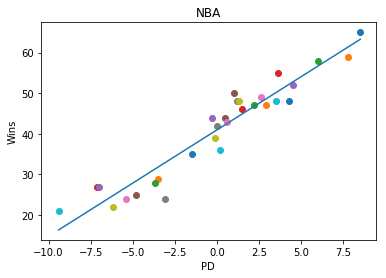

In [23]:
for sample in enumerate(nba):
    plt.scatter(sample[1][0], sample[1][1])
plt.xlabel('PD')
plt.ylabel('Wins')
plt.title('NBA')
plt.plot([-9.4,8.5],[getY(-9.4,theta),getY(8.5, theta)])

Here we are at the end, now that we have seen how the regression works, we can now apply to other fields. Now, let's see which teams make the playoffs next year and learn from our regression.

All stats were pulled from basketball-reference.com. If you are in interested in making more linear regressions with NBA data, use different variables found on https://www.basketball-reference.com/leagues/NBA_2018.html#all_team-stats-per_game to measure other stats against number of wins.

In [25]:
predict(3,theta)

48.85339941699753